![](NEURAL_NETWORKS.jpg)

# Simple MNIST
## Done By : Alireza Khodakarami

### Imports

We import needed modules for data pre processing. cv2 is used for reading and manipulating images, random is used for shuffling the data, pickle is being used for saving the final data as binary on hard drive for later usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

%matplotlib inline

### Sample an image

We read one image and convert it to array and show it. This image is a sample for our future manipulation tests to see what would be best for pre processing the whole data set.

We convert all the images to gray scale, dropping the color information. In case of cats and dogs, we don't need the color information because the body and face features on the images should be enough to identify the object in the picture.

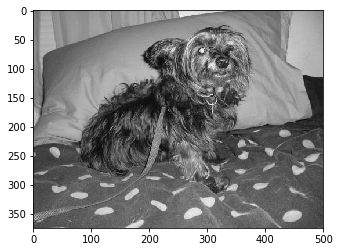

In [2]:
data_dir = './Data/PetImages'
categories = ['Dog', 'Cat']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show
        break
    break

### Print information of the image

As always, it's a good habit to print the shape and data atleast once to see what we are dealing with.

In [ ]:
print(img_array.shape)
print('=================')
print(img_array)

### Image Size

We need to unify the image sized to fit into neural network, this is part of normalization. When you want to teach a neural network, your data should be standardized as much as possible. If you send a landscape image to neural network and then another image with different proportions, neural network will be confused and can't teach itself properly.

Different image sized will have two effects :

1. The smaller image size is, the smaller your final data on hard drive will be.
2. The smaller image size is, the amount of pixel data used for neural teaching will be reduced and neural may fail for better predictions.

In [11]:
img_size = 150

### Image Resizing

We use the image size and cv module to resize the image. We plot the image to see what we are getting after the resize on the sample image. We don't want **too much** info for neural but at the same time **not enough** info should be avoided.

<function matplotlib.pyplot.show(*args, **kw)>

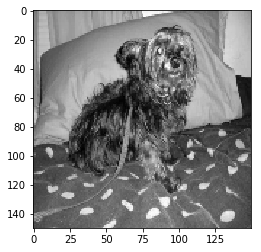

In [12]:
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show

### Data Pre-Processing

Finally we are ready to read all the data from hard drive, pre process them for making them array, gray scale and then resize them. Pay attention to class_num, this is how we label our data. Our model will be a classification type so we need to label our data for teaching the neural on what it should have as result. At the end, the data we prepare for training is a list containing two elements : first element is another list containing all the pixel information, and second element is the label for this image being cat or dog.

In [13]:
train_data=[]

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            train_data.append([new_array, class_num])
        except Exception as e:
            pass

### Shuffling

We need to randomize the order of data. If you give data to neural as they where, the first 12,000 images would all be Dogs and the neural would learn how to predict dogs really fast (just predict dog and you get 50% accuracy!) and from there, it would really have hard time learning how to predict cats. But, with shuffling the data, we make sure neural has almost equal chance of seeing a dog and cat during training itself at the same time. Finally we print the first 10 labels on the list after shuffling to see how the shuffling works. If we see too many 0 or 1 in the first 10 labels, we can simply rung the process once more. Ideally we would like to see 4-6 0 or 1 and the rest being the other label.

In [ ]:
random.shuffle(train_data)
print(len(train_data))
print('======================')
for sample in train_data[:10]:
    print(sample[1])

### Define training and label lists

For training a classification network, we need two data set, one being the input, and one the labels the real data present so that during the training, neural use the inputs and try predict, and compare the prediction with the label.

A standard programmers of neural network use is X (upper case letter) for training data and y (lower case letter) for labels. Another standard would be x_train and y_label (or y_train).

In [14]:
X=[]
y=[]

### Assigning the data

Now we read our training data and assign the X and y lists respectedly. Next, we need to reshape the X list (inputs) to make it ready for tensor flow. Without reshaping data, tensor flow would fail noticing these data as proper inputs.

-1 as the first element means that we don't care about this element and it can be anything. In reality, the first element is always the number of data we are providing and tensor flow does not care about this one. What tensor flow needs to know is the size of rows and columns of data and how many input they are representing (here is one color).

In [15]:
for features, label in train_data:
    X.append(features)
    y.append(label)
    
num_color = 1
X = np.array(X).reshape(-1, img_size, img_size, num_color)

### Saving the data

Here, we finally save the prepared data on hard drive as binary. From this point forward, as long as we wouldn't need changing the data, we don't need to run this file any more and instead we can read the pre-processed data from hard drive.

In [16]:
pickle_out = open('./Data/PetImages/X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('./Data/PetImages/y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()